# Regression

*Adapted from [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/)*

## Motivation

**Regression problems** are supervised learning problems in which the response is continuous. **Classification problems** are supervised learning problems in which the response is categorical. **Linear regression** is a technique that is useful for regression problems.

So, why are we learning linear regression?

- widely used
- runs fast
- easy to use (not a lot of tuning required)
- highly interpretable
- basis for many other methods

## Libraries

We'll be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !pip3 install statsmodels
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

C:\Users\v-trilp\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [3]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the **features**?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the **response**?
- Sales: sales of a single product in a given market (in thousands of widgets)


In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 **observations**, and thus 200 markets in the dataset.

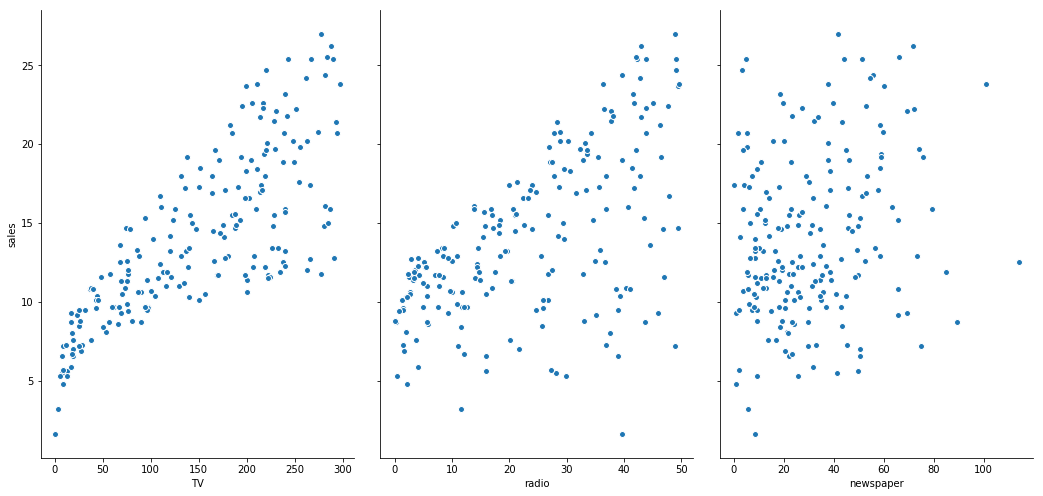

In [5]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7)

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

# Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

![Estimating coefficients](estimating_coefficients.png)

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

![Slope-intercept](slope_intercept.png)

Let's estimate the model coefficients for the advertising data:

In [6]:
### STATSMODELS ###

# create a fitted model
linearModel1 = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
linearModel1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [7]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data.sales

# instantiate and fit
linearModel2 = LinearRegression()
linearModel2.fit(X, y)

# print the coefficients
print(linearModel2.intercept_)
print(linearModel2.coef_)

7.032593549127693
[0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [8]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [9]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
linearModel1.predict(X_new)

0    9.409426
dtype: float64

In [10]:
### SCIKIT-LEARN ###

# predict for a new observation
linearModel2.predict(50)

array([9.40942557])

Thus, we would predict Sales of **9,409 widgets** in that market.

## Plotting the Least Squares Line

Let's plot the least squares line for Sales versus each of the features:

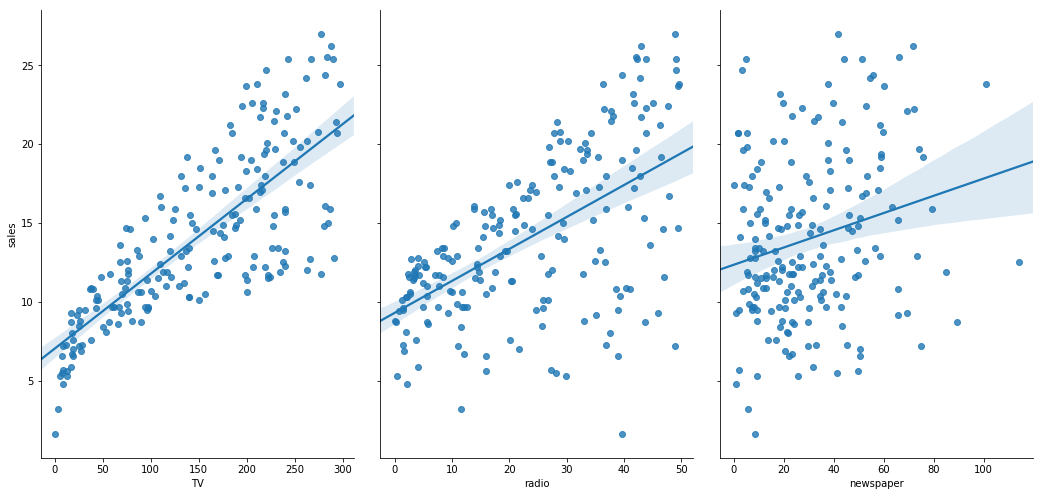

In [11]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

## Confidence in our Model

**Question:** Is linear regression a high variance/low bias model, or a low variance/high bias model?

**Answer:** Low variance/high bias. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is **confidence intervals**. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

In [12]:
### STATSMODELS ###

# print the confidence intervals for the model coefficients
linearModel1.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a **single sample of data**, and not the **entire population of data**. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is **probably** within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values

Closely related to confidence intervals is **hypothesis testing**. Generally speaking, you start with a **null hypothesis** and an **alternative hypothesis** (that is opposite the null). Then, you check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- **null hypothesis:** There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval **does not include zero**. Conversely, the **p-value** represents the probability that the coefficient is actually zero:

In [13]:
### STATSMODELS ###

# print the p-values for the model coefficients
linearModel1.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval **includes zero**, the p-value for that coefficient will be **greater than 0.05**. If the 95% confidence interval **does not include zero**, the p-value will be **less than 0.05**. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we **believe** that there is a relationship between TV ads and Sales.

Note that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

![R-squared](r_squared.png)

You can see that the **blue line** explains some of the variance in the data (R-squared=0.54), the **green line** explains more of the variance (R-squared=0.64), and the **red line** fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:


In [14]:
### STATSMODELS ###

# print the R-squared value for the model
linearModel1.rsquared

0.611875050850071

In [15]:
### SCIKIT-LEARN ###

# print the R-squared value for the model
linearModel2.score(X, y)

0.611875050850071

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

# Multiple Linear Regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's estimate these coefficients:

In [16]:
### STATSMODELS ###

# create a fitted model with all three features
linearModel1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
linearModel1.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [17]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# instantiate and fit
linearModel2 = LinearRegression()
linearModel2.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
# print the coefficients
print(linearModel2.intercept_)
print(linearModel2.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [19]:
# pair the feature names with the coefficients
coefList = zip(feature_cols, linearModel2.coef_)
print(list(coefList))

[('TV', 0.045764645455397615), ('radio', 0.18853001691820456), ('newspaper', -0.0010374930424763272)]


How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an **increase of $1000 in TV ad spending** is associated with an **increase in Sales of 45.765 widgets**.

A lot of the information we have been reviewing piece-by-piece is available in the Statsmodels model summary output:

In [20]:
### STATSMODELS ###

# print a summary of the fitted model
linearModel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           1.58e-96
Time:                        00:23:41   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?

- TV and Radio have significant **p-values**, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both **positively associated** with Sales, whereas Newspaper ad spending is **slightly negatively associated** with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher **R-squared** (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

# Feature Selection

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep features in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new features.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [21]:
### STATSMODELS ###

# only include TV and Radio in the model
linearModel1 = smf.ols(formula='sales ~ TV + radio', data=data).fit()
linearModel1.rsquared

0.8971942610828956

In [22]:
# add Newspaper to the model (which we believe has no association with Sales)
linearModel1 = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
linearModel1.rsquared

0.8972106381789522

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Train/test split** or **cross-validation.** They provide a more reliable estimate of out-of-sample error, and thus are better for choosing which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to **any model**, whereas the methods described above only apply to **linear models**.

# Model Evaluation

## Model Evaluation Metrics for Regression

For classification problems, we have only used classification accuracy as our evaluation metric. What metrics can we used for regression problems?

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Let's calculate these by hand, to get an intuitive sense for the results:

In [23]:
# define true and predicted response values
y_true = [100, 50, 30, 20]
y_pred = [90, 50, 50, 30]

# calculate MAE, MSE, RMSE
print('Mean Absolute Error :', metrics.mean_absolute_error(y_true, y_pred))
print(metrics.mean_squared_error(y_true, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

Mean Absolute Error : 10.0
150.0
12.24744871391589


MSE is more popular than MAE because MSE "punishes" larger errors. But, RMSE is even more popular than MSE because RMSE is interpretable in the "y" units.

## Model Evaluation Using Train/Test Split

Let's use train/test split with RMSE to see whether Newspaper should be kept in the model:

In [24]:
# include Newspaper
X = data[['TV', 'radio', 'newspaper']]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linearModel2 = LinearRegression()
linearModel2.fit(X_train, y_train)
y_pred = linearModel2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


In [25]:
# exclude Newspaper
X = data[['TV', 'radio']]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linearModel2 = LinearRegression()
linearModel2.fit(X_train, y_train)
y_pred = linearModel2.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


## Handling Categorical Features with Two Categories

Up to now, all of our features have been numeric. What if one of our features was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [26]:
# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [27]:
# create a new Series called Size_large
data['Size_large'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,Size_large
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the **Size_large** feature:

In [28]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = data[feature_cols]
y = data.sales

# instantiate, fit
linearModel2 = LinearRegression()
linearModel2.fit(X, y)

# print coefficients
coeffs = zip(feature_cols, linearModel2.coef_)
print(list(coeffs))


[('TV', 0.045719820924362775), ('radio', 0.1887281431342787), ('newspaper', -0.0010976794483516655), ('Size_large', 0.05742385085482776)]


How do we interpret the **Size_large coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 57.42 widgets (as compared to a small market, which is called the **baseline level**).

What if we had reversed the 0/1 coding and created the feature 'Size_small' instead? The coefficient would be the same, except it would be **negative instead of positive**. As such, your choice of category for the baseline does not matter, all that changes is your **interpretation** of the coefficient.

## Handling Categorical Features with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [29]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban, and thus urban is somehow "twice" the suburban category. Note that if you do have ordered categories (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

Anyway, our Area feature is unordered, so we have to create **additional dummy variables**. Let's explore how to do this using pandas:

In [30]:
# Important Tip
# create three dummy variables using get_dummies 
pd.get_dummies(data.Area, prefix='Area').head()

,Area_rural,Area_suburban,Area_urban
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,1,0


However, we actually only need **two dummy variables, not three**. Why? Because two dummies captures all of the "information" about the Area feature, and implicitly defines rural as the "baseline level".

Let's see what that looks like:

In [31]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]
area_dummies.head()

,Area_suburban,Area_urban
1,0,0
2,0,1
3,0,0
4,0,1
5,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

If this is confusing, think about why we only needed one dummy variable for Size (Size_large), not two dummy variables (Size_small and Size_large). In general, if you have a categorical feature with k "levels", you create k-1 dummy variables.

Anyway, let's add these two new dummy variables onto the original DataFrame, and then include them in the linear regression model:

In [32]:
# concatenate the dummy variable columns onto the DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


In [33]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales

# instantiate and fit
linearModel2 = LinearRegression()
linearModel2.fit(X, y)

# print the coefficients
model2Coeffs = zip(feature_cols, linearModel2.coef_)
print(list(model2Coeffs))

[('TV', 0.04574401036331375), ('radio', 0.1878666955252581), ('newspaper', -0.0010876977267107583), ('Size_large', 0.07739660749747913), ('Area_suburban', -0.10656299015958641), ('Area_urban', 0.26813802165220046)]


How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 268.13 widgets (as compared to rural).

## What Didn't We Cover?

- Detecting collinearity
- Diagnosing model fit
- Transforming features to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to **start your modeling process** when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a **linear relationship** between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

Therefore, we want you to understand linear regression conceptually, understand its strengths and weaknesses, be familiar with the terminology, and know how to apply it. However, we also want to spend time on many other machine learning models, which is why we aren't going deeper here.

# Extra Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. 
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).

# Logistic Regression and Confusion Matrix


In [34]:
###############################################################################
### Logistic Regression
###############################################################################

# Imports
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from math import exp
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Read in data
data = pd.read_csv('studentDefaultData.csv')
data.head()

FileNotFoundError: File b'studentDefaultData.csv' does not exist

In [ ]:
# Change column to number
data['student_bin'] = data.student.map({'No':0, 'Yes':1})

In [ ]:
# Let's do some cursory analysis.
data.groupby('default').balance.mean()
data.groupby('default').income.mean()

In [ ]:
# Set X and y
feature_cols = ['balance', 'income','student_bin']
X = data[feature_cols]
y = data.default
    

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [ ]:
# Fit model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) # Predict

In [ ]:
# Access accuracy
print(metrics.accuracy_score(y_test, y_pred)) # accuracy_score(y_test, y_pred)

In [ ]:
###############################################################################
### Null Accuracy Rate
###############################################################################

# Compare to null accuracy rate. The null accuracy rate is the accuracy if I 
# predict all the majority class.  If there are more 1's, I predict all 1's.  
# If there are more 0's, I predict all 0's. There are several ways to do this.

# 1. Create a vector of majority class and use the accuracy_score.
# "If I predicted all 0's, how accurate would I be?
print(metrics.accuracy_score(y_test, [0]*len(y_test)))


In [ ]:
# 2. Calculate the mean of y_test (AKA the percentage of 1's)
y_test.mean()
# One minus that number will be the percentage of 0's.  This means that if you 
# predict all 0's, you will be correct 1-y_test-mean() percent of the time.
1 - y_test.mean()

# This puts our accuracy score into context a bit.  We can now see that we 
# actually didn't do so great!

In [ ]:
###############################################################################
### Intepretting Logistic Regression Coefficients
###############################################################################

# Let's look at the coefficients
for col in zip(feature_cols, logreg.coef_[0]):
    print(col[0], col[1])
    
# Let's interpret those.
for col in zip(feature_cols, logreg.coef_[0]):
    print('A unit increase in', col[0], 'equals a', exp(col[1]), 'increase in odds.')

In [ ]:
###############################################################################
### Confusion Matrix
###############################################################################

# Let's look at the confusion matrix
con_mat = metrics.confusion_matrix(y_test, y_pred)
print(con_mat)

In [ ]:
# Let's define our true posititves, false positives, true negatives, and false negatives
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]

print(true_pos)

In [ ]:
# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print(sensitivity)
print(metrics.recall_score(y_test, y_pred))

In [ ]:
# Specificity: percent of correct predictions when reference value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print(specificity)

In [ ]:
###############################################################################
### Logistic Regression Thresholds
###############################################################################

# Logistic regression is actually predicting the underlying probability.  
# However, when you call the "predict" function, it returns class labels.  You
# can still predict the actual probability and set your own threshold if you'd
# like.  This can be useful in cases where the "signal" from the model isn't 
# strong.

# Predict probabilities
logreg.predict_proba(X_test).shape
probs = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# The natural threshold for probabilility is 0.5, but you don't have to use 
# that.

# Use 0.5 thrshold for predicting 'default' and confirm we get the same results
preds_05 = np.where(probs >= 0.5, 1, 0)
print(metrics.accuracy_score(y_test, preds_05))
con_mat_05 = metrics.confusion_matrix(y_test, preds_05)
print(con_mat_05)

In [ ]:
# Let's look at a histogram of these probabilities.
plt.hist(probs, bins=20)
plt.title('Distribution of Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Change cutoff for predicting default to 0.2
preds_02 = np.where(probs > 0.2, 1, 0)
delta = float((preds_02 != preds_05).sum())/len(X_test)*100
print('Changing the threshold from 0.5 to 0.2 changed %.2f percent of the predictions.' % delta)

In [ ]:
# Check the new accuracy, sensitivity, specificity
print(metrics.accuracy_score(y_test, preds_02))
con_mat_02 = metrics.confusion_matrix(y_test, preds_02)
print(con_mat_02)

In [ ]:
# Let's define our true posititves, false positives, true negatives, and false negatives
true_neg = con_mat_02[0][0]
false_neg = con_mat_02[1][0]
true_pos = con_mat_02[1][1]
false_pos = con_mat_02[0][1]

In [ ]:
# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print(sensitivity)
print(metrics.recall_score(y_test, preds_02))

In [ ]:
# Specificity: percent of correct predictions when reference value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print(specificity)

### Example


Let's try logistic regression on the glass identification dataset .  Dataset is located at
http://archive.ics.uci.edu/ml/datasets/Glass+Identification.

In [ ]:
# Read the data into a pandas dataframe.

# Load data
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data',
                 names=['id','ri','na','mg','al','si','k','ca','ba','fe','glass_type'],
                 index_col='id')

In [ ]:
df.head(5)

In [ ]:
# Explore the data and look at what columns are available.

df.shape # 214 x 10

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.glass_type.value_counts()

In [ ]:
df.isnull().sum() # No nulls in our data

In [ ]:
# Convert the 'glass type' column into a binary response.
#    * If type of class = 1/2/3/4, binary=0.
#    * If type of glass = 5/6/7, binary=1.

    
df['binary'] = np.where(df.glass_type < 5, 0, 1)                        # method 1
df['binary'] = df.glass_type.map({1:0, 2:0, 3:0, 4:0, 5:1, 6:1, 7:1})   # method 2
df.binary.value_counts()

In [ ]:
# Create a feature matrix and a response vector. 

features = ['ri','na','mg','al','si','k','ca','ba','fe']    # create a list of features
features = df.columns[:-2]      # alternative way: slice 'columns' attribute like a list
X = df[features]                # create DataFrame X by only selecting features
y = df.binary

In [ ]:
# Split the data into the appropriate training and testing sets.


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [ ]:
# Create and fit a logistic regression model.

logreg = LogisticRegression() # Instatiate estimator
logreg.fit(X_train, y_train) # Fit data

In [ ]:
# Make predictions with your new model.

y_pred = logreg.predict(X_test) # Create predictions

In [ ]:
# Calculate the accuracy rate of the model and compare it to the null accuracy.

# Calculate accuracy of model
metrics.accuracy_score(y_test, y_pred)  

In [ ]:
metrics.r2_score(y_test, y_pred)

In [ ]:
# Calculate null accuracy
metrics.accuracy_score(y_test, [0]*len(y_test))

In [ ]:
# Generate a confusion matrix for your predictions.  Use this to calculate the
# sensitivity and specificity of the model.

# Let's look at the confusion matrix
confusionMatrix = metrics.confusion_matrix(y_test, y_pred)
print(confusionMatrix)

In [ ]:
# Let's define our true posititves, false positives, true negatives, and false negatives
true_neg = con_mat[0][0]
false_neg = con_mat[1][0]
true_pos = con_mat[1][1]
false_pos = con_mat[0][1]

In [ ]:
# Sensitivity: percent of correct predictions when reference value is 'default'
sensitivity = float(true_pos)/(false_neg + true_pos)
print(sensitivity)

In [ ]:
# Specificity: percent of correct predictions when reference value is 'not default'
specificity = float(true_neg) / (true_neg + false_pos)
print(specificity)

# Regularization with Linear Regression


In this section we'll cover the following regularized regression methods
        - Ridge, 
        - RidgeCV, 
        - Lasso, 
        - LassoCV
        - Elastic Net ( a combination of above, will not be covering today)
        
More information at http://scikit-learn.org/stable/modules/linear_model.html


Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:

- Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
- Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. If you’ve heard of them before, you must know that they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. The key difference is in how they assign penalty to the coefficients:

###  Ridge Regression:
Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients where the 

    Minimization objective = LS Obj + α * (sum of square of coefficients)

### Lasso Regression:
Performs L1 regularization, i.e. adds penalty equivalent to absolute value of the magnitude of coefficients
Minimization objective = LS Obj + α * (sum of absolute value of coefficients)
Note that here ‘LS Obj’ refers to ‘least squares objective’, i.e. the linear regression objective without regularization.

## Why Penalize the Magnitude of Coefficients?

### Simple Linear Regression
Lets try to understand the impact of model complexity on the magnitude of coefficients. As an example, we have a sine curve (between 60° and 300°) and with added random noise:

In [ ]:
#Importing libraries. The same will be used throughout the article.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [ ]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([x_values*np.pi/180 for x_values in range(60,300,1)])
np.random.seed(10)  #Setting seed for reproducability
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
data.head(5)

In [ ]:
plt.plot(data['x'],data['y'],'.')

This resembles a sine curve but not exactly because of the noise. 
Lets try to estimate the sine function using polynomial regression with powers of x form 1 to 15. Lets add a column for each power upto 15 in our dataframe. 


In [ ]:
for columns in range(2,16):  #power of 1 is already there
    colname = 'x_%d'%columns      #new var will be x_power
    data[colname] = data['x']**columns
print(data.head())

Now that we have all the 15 powers, let's make 15 different linear regression models with each model containing variables with powers of x from 1 to the particular model number. For example, the feature set of model 3 will be {x, x_2, x_3}.

First, we’ll define a generic function which takes in the required maximum power of x as an input and returns a list containing – [ model RSS, intercept, coef_x, coef_x2, … upto entered power ]. 

RSS : Residual Sum of Squares - The sum of square of errors between the predicted and actual values in the training data set. 

In [ ]:
#Import Linear Regression model from scikit-learn.
from sklearn.linear_model import LinearRegression
def linear_regression(data, power, modelsToPlot):
    #initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    #Fit the model
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    predictedY = linreg.predict(data[predictors])
    
    #Plotting
    if power in modelsToPlot:
        plt.subplot(modelsToPlot[power])
        plt.tight_layout()
        plt.plot(data['x'],predictedY)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for power: %d'%power)
    
    #Return the result in pre-defined format
    rss = sum((predictedY-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

Note that this function will not plot the model fit for all the powers but will return the RSS and coefficients for all the models. 

Now, we can make all 5 models and compare the results. For ease of analysis, we’ll store all the results in a Pandas dataframe and plot 6 models to get an idea of the trend. 

In [ ]:
#Initialize a dataframe to store the results:
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
simpleCoeffMatrix = pd.DataFrame(index=ind, columns=col)


In [ ]:
#Define the powers for which a plot is required:
modelsToPlot = {1:231,3:232,6:233,9:234,12:235,15:236}

In [ ]:
#Iterate through all powers and assimilate results
for i in range(1,16):
    simpleCoeffMatrix.iloc[i-1,0:i+2] = linear_regression(data, power=i, modelsToPlot=modelsToPlot)
 

We would expect the models with increasing complexity to better fit the data and result in lower RSS values. As the model complexity increases, the models tends to fit even smaller deviations in the training data set. Though this leads to overfitting, lets keep this issue aside for some time and come to our main objective, i.e. the impact on the magnitude of coefficients. This can be analyzed by looking at the data frame created above.

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
simpleCoeffMatrix

It is clearly evident that the size of coefficients increase exponentially with increase in model complexity. Therefore putting a constraint on the magnitude of coefficients will be required to reduce model complexity.

Lets try to understand this even better.


A large coefficient means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.


 
### Ridge Regression

Ridge regression performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective. Thus, ridge regression optimizes the following:

    Objective = RSS + α * (sum of square of coefficients)

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

    - α = 0: 
        - simple linear regression.
        - same coefficients as simple linear regression.
    - α = ∞:
        - The coefficients will be zero since infinite weight  on square of coefficients, anything less than zero will make the objective infinite.
        
    - 0 < α < ∞:
        - The magnitude of α will decide the weights given to different parts of objective.
    - The coefficients will be somewhere between 0 and 1 for simple linear regression.
    


First, lets define a generic function for ridge regression similar to the one defined for simple linear regression. 

In [ ]:
from sklearn.linear_model import Ridge
def ridgeRegression(data, predictors, alpha, modelsToPlot={}):
    #Fit the model
    ridgereg = Ridge(alpha=alpha,normalize=True)
    ridgereg.fit(data[predictors],data['y'])
    predictedY = ridgereg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in modelsToPlot:
        plt.subplot(modelsToPlot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],predictedY)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((predictedY-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

The sklearn ‘Ridge’ function takes ‘alpha’ as a parameter on initialization. Also, keep in mind that normalizing/standardizing the inputs is generally a good idea in every type of regression and should be used in case of ridge regression as well.

Now, lets analyze the result of Ridge regression for 10 different values of α ranging from 1e-15 to 20. These values have been chosen so that we can easily analyze the trend with change in values of α. These would however differ from case to case.

Note that each of these 10 models will contain all the 15 variables and only the value of alpha would differ. This is different from the simple linear regression case where each model had a subset of features.

In [ ]:
#Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

In [ ]:
#Set the different values of alpha to be tested
alphaValuesForRidge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

In [ ]:
#Initialize the dataframe for storing coefficients.
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alphaValuesForRidge[i] for i in range(0,10)]
ridgeCoeffMatrix = pd.DataFrame(index=ind, columns=col)

In [ ]:
modelsToPlot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    ridgeCoeffMatrix.iloc[i,] = ridgeRegression(data, predictors, alphaValuesForRidge[i], modelsToPlot)

Here we can clearly observe that as the value of alpha increases, the model complexity reduces. Though higher values of alpha reduce overfitting, significantly high values can cause underfitting as well (eg. alpha = 5). Thus alpha should be chosen wisely. A widely accept technique is cross-validation, i.e. the value of alpha is iterated over a range of values and the one giving higher cross-validation score is chosen.

Lets have a look at the value of coefficients in the above models:

In [ ]:
#Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
ridgeCoeffMatrix

Observations:
    - The RSS increases with increase in alpha, this model complexity reduces
    - An alpha as small as 1e-15 gives us significant reduction in magnitude of coefficients. How? Compare the coefficients in the first row of this table to the last row of simple linear regression table.
    - High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
    - Though the coefficients are very very small, they are NOT zero.


In [ ]:
ridgeCoeffMatrix.apply(lambda x: sum(x.values==0),axis=1)

This confirms that all the 15 coefficients are greater than zero in magnitude (can be positive or negative). 

###  Lasso Regression

LASSO stands for Least Absolute Shrinkage and Selection Operator - the keywords are – ‘absolute‘ and ‘selection‘.

Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. 

    - α = 0: Same coefficients as simple linear regression
    - α = ∞: All coefficients zero (same logic as before)
    - 0 < α < ∞: coefficients between 0 and that of simple linear regression
    


In [ ]:
from sklearn.linear_model import Lasso
def lassoRegression(data, predictors, alpha, modelsToPlot={}):
    #Fit the model
    lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
    lassoreg.fit(data[predictors],data['y'])
    predictedY = lassoreg.predict(data[predictors])
    
    #Check if a plot is to be made for the entered alpha
    if alpha in modelsToPlot:
        plt.subplot(modelsToPlot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],predictedY)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    #Return the result in pre-defined format
    rss = sum((predictedY-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

Notice the additional parameters defined in Lasso function – ‘max_iter‘. This is the maximum number of iterations for which we want the model to run if it doesn’t converge before.

Lets check the output for 10 different values of alpha:

In [ ]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

In [ ]:
#Define the alpha values to test
alphaValuesForLasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

In [ ]:
#Initialize the dataframe to store coefficients
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alphaValuesForLasso[i] for i in range(0,10)]
lassoCoeffMatrix = pd.DataFrame(index=ind, columns=col)

In [ ]:
#Define the models to plot
modelsToPlot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

In [ ]:
#Iterate over the 10 alpha values:
for i in range(10):
    lassoCoeffMatrix.iloc[i,] = lassoRegression(data, predictors, alphaValuesForLasso[i], modelsToPlot)

This again tells us that the model complexity decreases with increase in the values of alpha. But notice the straight line at alpha=1. 

Apart from the expected inference of higher RSS for higher alphas, we can see the following:
    - For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare the first row of the 2 tables).
    - For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression
    - Many of the coefficients are zero even for very small values of alpha
    

In [ ]:
lassoCoeffMatrix.apply(lambda x: sum(x.values==0),axis=1)

We can observe that even for a small value of alpha, a significant number of coefficients are zero. This also explains the horizontal line fit for alpha=1 in the lasso plots, its just a baseline model! This phenomenon of most of the coefficients being zero is called ‘sparsity‘. Although lasso performs feature selection, this level of sparsity is achieved in special cases only.



### Key Differences

* Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity.
* Lasso: Along with shrinking coefficients, lasso performs feature selection as well. (Remember the ‘selection‘ in the lasso full-form?) As we observed earlier, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

Traditionally, techniques like stepwise regression were used to perform feature selection and make parsimonious models. But with advancements in Machine Learning, ridge and lasso regression provide very good alternatives as they give much better output, require fewer tuning parameters and can be automated to a large extend.

 

### Typical Use Cases

*Ridge: It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of large number of #features, say in millions, as it will pose computational challenges.

*Lasso: Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

Its not hard to see why the stepwise selection techniques become practically very cumbersome to implement in high dimensionality cases. Thus, lasso provides a significant advantage.

 

### In case of Highly Correlated Features

*Ridge: It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.

*Lasso: It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.

This disadvantage of lasso can be observed in the example we discussed above. Since we used a polynomial regression, the variables were highly correlated. Thus, we saw that even small values of alpha were giving significant sparsity (i.e. high #coefficients as zero).

Along with Ridge and Lasso, Elastic Net is another useful techniques which combines both L1 and L2 regularization which we will not be covering in this class. 

##### Example : UCI Crime Data ( http://archive.ics.uci.edu/ml/datasets/Communities+and+Crime )

In [ ]:
# Prepare data 
# read in data, 
# remove categorical features, 
# remove rows with missing values
import pandas as pd
crime = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data', header=None, na_values=['?'])
crime = crime.iloc[:, 5:]
crime.dropna(inplace=True)
crime.head()

In [ ]:
# define X and y
X = crime.iloc[:, :-1]
y = crime.iloc[:, -1]

In [ ]:
# split into train/test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
########## Linear Regression Model Without Regularization ##########
# linear regression
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)
# lm.coef_

In [ ]:
# make predictions and evaluate
import numpy as np
from sklearn import metrics
preds = lm.predict(X_test)
print('RMSE (no regularization) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-squared : ', metrics.r2_score(y_test, preds))

In [ ]:
########## Ridge Regression Model ##########
# ridge regression (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Ridge
rreg = Ridge(alpha=0.1, normalize=True)
rreg.fit(X_train, y_train)
rreg.coef_
preds = rreg.predict(X_test)
print('RMSE (Ridge reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-squared : ', metrics.r2_score(y_test, preds))

In [ ]:
# use RidgeCV to select best alpha
from sklearn.linear_model import RidgeCV
alpha_range = 10.**np.arange(-2, 3)
rregcv = RidgeCV(normalize=True, scoring='neg_mean_squared_error', alphas=alpha_range)
rregcv.fit(X_train, y_train)
rregcv.alpha_
preds = rregcv.predict(X_test)
print('RMSE (Ridge CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-squared : ', metrics.r2_score(y_test, preds))

In [ ]:
########## Lasso Regression Model ##########
# lasso (alpha must be positive, larger means more regularization)
from sklearn.linear_model import Lasso
las = Lasso(alpha=0.01, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print('RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-squared : ', metrics.r2_score(y_test, preds))

In [ ]:
# try a smaller alpha
las = Lasso(alpha=0.0001, normalize=True)
las.fit(X_train, y_train)
las.coef_
preds = las.predict(X_test)
print('RMSE (Lasso reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-squared : ', metrics.r2_score(y_test, preds))

In [ ]:
# use LassoCV to select best alpha (tries 100 alphas by default)
from sklearn.linear_model import LassoCV
lascv = LassoCV(normalize=True, alphas=alpha_range)
lascv.fit(X_train, y_train)
lascv.alpha_
lascv.coef_
preds = lascv.predict(X_test)
print('RMSE (Lasso CV reg.) =', np.sqrt(metrics.mean_squared_error(y_test, preds)))
print('R-squared : ', metrics.r2_score(y_test, preds))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
treeclf = DecisionTreeRegressor(max_depth=3, random_state=1)
treeclf.fit(X_train, y_train)
predictedValues = treeclf.predict(X_test) # validationData[featureCols])

# Access accuracy
print('RMSE (Decision Tree Regressor) =', np.sqrt(metrics.mean_squared_error(y_test, predictedValues)))
print('R-squared : ', metrics.r2_score(y_test, predictedValues))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100, max_features=3, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)
randomForestPredicted = rfreg.predict(X_test)
# Access accuracy
print('RMSE (Random Forest Regressor) =', np.sqrt(metrics.mean_squared_error(y_test, randomForestPredicted)))
print('R-squared : ', metrics.r2_score(y_test, randomForestPredicted))

# Regularization with Logistic Regression

    Regularized classification using LogisticRegression

    More info at ( http://scikit-learn.org/stable/modules/linear_model.html )
##### We'll be using Titanic data from Kaggle website 
(n=891, p=5 selected, type=classification) ( https://www.kaggle.com/c/titanic-gettingStarted/data) 

In [ ]:
########## Prepare data ##########
# Get and prepare data
titanic = pd.read_csv('titanic_train.csv')
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})
titanic.Age.fillna(titanic.Age.mean(), inplace=True)
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [ ]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [ ]:
# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
########## Logistic Regression Model Without Regularization ##########
# logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
logreg.coef_
y_pred = logreg.predict(X_test_scaled)

# Access accuracy
print('Accuracy (no penalty) =', metrics.accuracy_score(y_test, y_pred))
print('ROC_AUC : ', metrics.roc_auc_score(y_test, y_pred))

In [ ]:
########## Logistic Regression With L1 Penalty ##########
# logistic regression with L1 penalty (C must be positive, smaller means more regularization)
logreg_l1 = LogisticRegression(C=0.1, penalty='l1')
logreg_l1.fit(X_train_scaled, y_train)
logreg_l1.coef_
y_pred_l1 = logreg_l1.predict(X_test_scaled)

# Access accuracy
print('Accuracy (L1 penalty) =', metrics.accuracy_score(y_test, y_pred_l1))


In [ ]:
########## Logistic Regression With L2 Penalty ##########
# logistic regression with L2 penalty (C must be positive, smaller means more regularization)
logreg_l2 = LogisticRegression(C=0.1, penalty='l2')
logreg_l2.fit(X_train_scaled, y_train)
logreg_l2.coef_
y_pred_l2 = logreg_l2.predict(X_test_scaled)

# Access accuracy
print('Accuracy (L2 penalty) =', metrics.accuracy_score(y_test, y_pred_l2))
print('ROC_AUC : ', metrics.roc_auc_score(y_test, y_pred_l2))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X_train_scaled, y_train)
predictedValues = treeclf.predict(X_test_scaled) # validationData[featureCols])

# Access accuracy
print('Accuracy Results =', metrics.accuracy_score(y_test, predictedValues))
print('ROC_AUC : ', metrics.roc_auc_score(y_test, predictedValues))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, max_features=4, oob_score=True, random_state=1)
rfclf.fit(X_train_scaled, y_train)
randomForestPredicted = rfclf.predict(X_test_scaled)
# Access accuracy
print('Accuracy Results =', metrics.accuracy_score(y_test, randomForestPredicted))

In [ ]:
print('ROC_AUC : ', metrics.roc_auc_score(y_test, randomForestPredicted))